## Introduction to neural network classification with Tensprflow

In this notebook, we will learn these kind off classification problems

* Binary Classification
* MultiClass Classification
* MultiLabel Classification

In [ ]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.17.0


### Creating data to view and fit

In [ ]:
# Creating data to view and fit

from sklearn.datasets import make_circles

n_samples = 1000

# create circles
x,y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)



In [ ]:
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Lets visualise our data
import pandas as pd
import matplotlib.pyplot as plt

circles = pd.DataFrame({'x0':x[:,0],
                        'x1':x[:,1],
                        'label':y})

In [ ]:
circles

x0        x1  label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

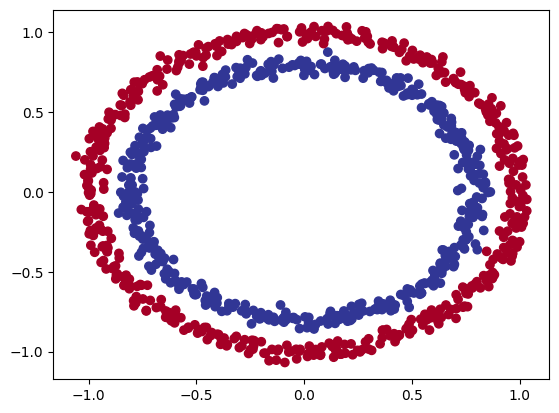

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)


## Input and Output shapes

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many smaples we are working with
len(x), len(y)

(1000, 1000)

In [ ]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
x[123], y[123]

(array([-1.0342695 , -0.11030223]), 0)

## Steps in Modelling

1. Create or import a model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate again

In [ ]:
# Lets code our own model

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

x_train = x[:900]
y_train = y[:900]
x_test = x[900:]
y_test = y[900:]

model.fit(x_test, y_test, epochs=100, verbose = 1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5603 - loss: 4.0932
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4872 - loss: 2.4725  
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5037 - loss: 0.7838  
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5144 - loss: 0.8883  
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5702 - loss: 1.2982 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5589 - loss: 0.7106 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4902 - loss: 0.6971 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4890 - loss: 0.7149 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4428 - loss: 0.7288 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4489 - loss: 0.7302 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4859 - loss: 0.7216  
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4773 - 

In [ ]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4620 - loss: 0.7051  


[0.7038453817367554, 0.4699999988079071]

In [ ]:
y_pred = model.predict(x_test)
y_pred = tf.squeeze(y_pred)
y_pred, y_test

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


(<tf.Tensor: shape=(100,), dtype=float32, numpy=
 array([0.4995988 , 0.41599768, 0.61637944, 0.6923808 , 0.65699255,
        0.466971  , 0.6333913 , 0.33698663, 0.6552614 , 0.31261548,
        0.49855602, 0.58396304, 0.57993543, 0.47549462, 0.36522204,
        0.34972438, 0.34890112, 0.3681725 , 0.46810588, 0.51765203,
        0.68627584, 0.40717298, 0.5790621 , 0.38703996, 0.32473007,
        0.30106497, 0.3999542 , 0.5374882 , 0.46691224, 0.37400043,
        0.47825116, 0.445574  , 0.5829575 , 0.6613053 , 0.3693788 ,
        0.51933527, 0.5405043 , 0.35922128, 0.6037956 , 0.66519064,
        0.46372393, 0.3700662 , 0.6099949 , 0.50110185, 0.32855642,
        0.3662245 , 0.37972903, 0.48547116, 0.6540563 , 0.4882739 ,
        0.4125623 , 0.4741658 , 0.64438707, 0.6731522 , 0.56273365,
        0.6484687 , 0.31853002, 0.64138764, 0.39453602, 0.46106845,
        0.31703156, 0.46360344, 0.4360141 , 0.61343676, 0.64270145,
        0.389005  , 0.51902103, 0.30453643, 0.67772686, 0.59405166,

In [ ]:
len(y_pred), len(y_test)

(100, 100)

In [ ]:
y_test = tf.constant(y_test)

In [ ]:
circles['label'].value_counts()

label
1    500
0    500
Name: count, dtype: int64

## Improving our model

Lets look into our bag of tricks to see how we can improve or model

1. `Create a model` - add new layer or increase the hidden units
2. `Compile a model` - choose a diff optimisation func like Adam/SGD
3. `Fit the model`  - train for longer




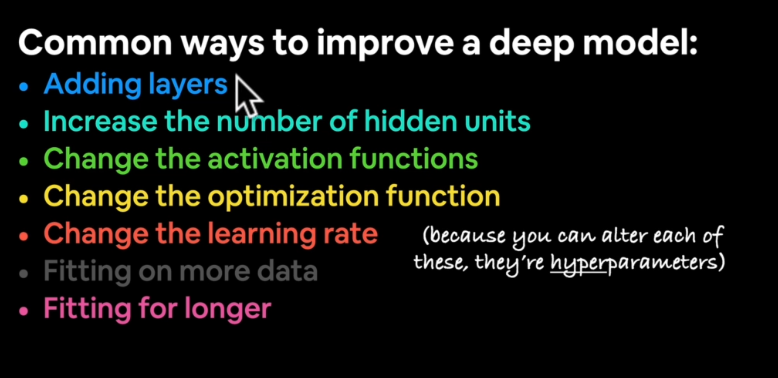

In [ ]:
# Set the seed
tf.random.set_seed(42)

# create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

model2.fit(x, y, epochs = 100)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4560 - loss: 3.5884
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4549 - loss: 0.7462
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5085 - loss: 0.6976
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4675 - loss: 0.6963
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4444 - loss: 0.6971
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4554 - loss: 0.6977
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4545 - loss: 0.6982
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4559 - loss: 0.6987
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4557 - loss: 0.6992
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4562 - loss: 0.6996
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4563 - loss: 0.7000
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [ ]:
# Evaluate the model
model2.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5068 - loss: 0.6917  


[0.6961312890052795, 0.49000000953674316]

In [ ]:
# model2.predict(x)

To visualize our models prediction, lets create a func `plot_decision_boundary()`, this function will:

* Take in a trained model, features (x) and label (y)
* Create a meshgrid of the different x values
* Make the prediction across the meshgrid
* Plot the prediction as well as a line between zones

`https://cs231n.github.io/neural-networks-case-study/`

In [ ]:

def plot_decision_boundary(model, x, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 1].max() + 0.1
  y_min, y_max = x[:, 0].min() - 0.1, x[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create x values (we will predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make the prediction using the model
  y_pred = model.predict(x_in)

  # Check for multiclass
  if model.output_shape[-1] > 1:  # Check the final dimension of the model's output shape
    print('Doin multiclass classification')
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print('Doing binary classification')
    y_pred = np.round(np.max(y_pred, axis = 1)).reshape(xx.shape)


  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(x[:, 0], x[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


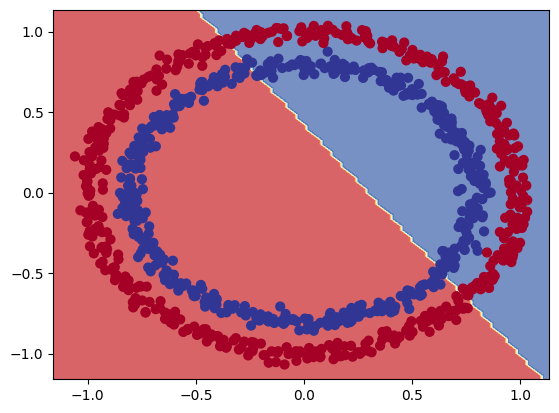

In [ ]:
plot_decision_boundary(model2, x, y)

## Lets see if our model can be used for regression problem


In [ ]:
# random seed
tf.random.set_seed(42)

# create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x+100

x_reg_train = x_regression[:150]
y_reg_train = y_regression[:150]
x_reg_test = x_regression[150:]
y_reg_test = y_regression[150:]

# model2.fit(tf.expand_dims(x_reg_train, axis =-1), y_reg_train, epochs = 100)
# Give error

## Typical Architecture
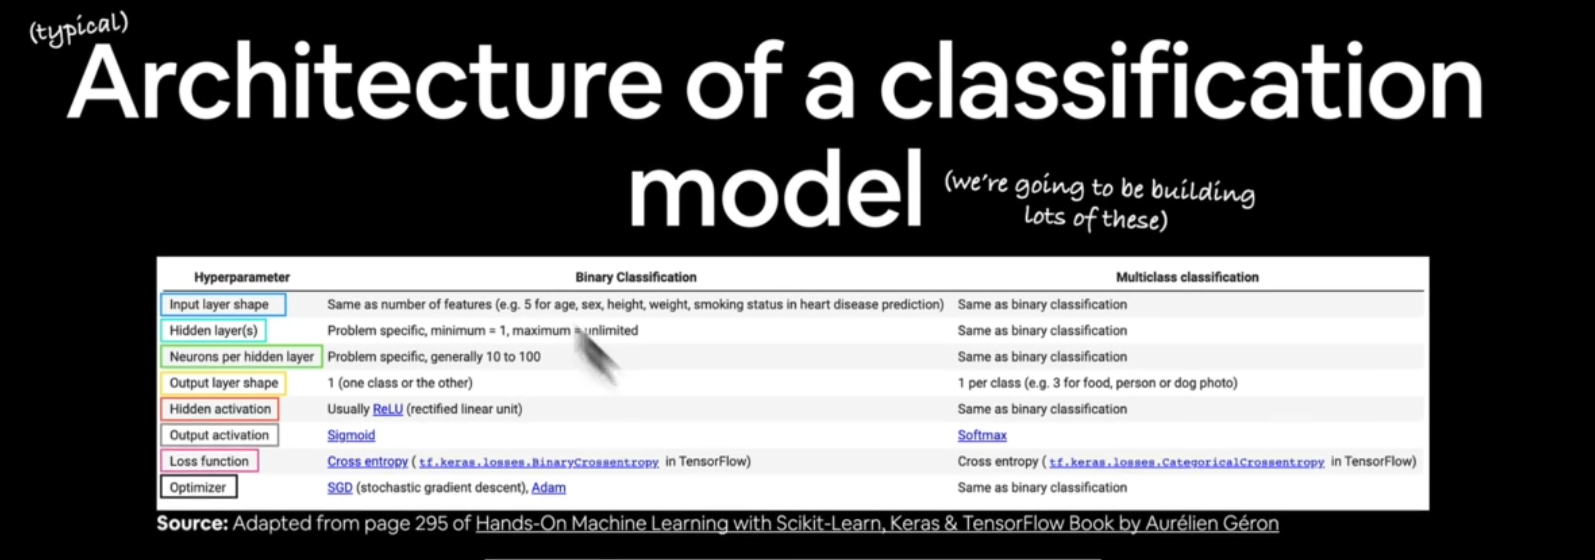

In [ ]:
# Recreating the model2 for regression data set
import tensorflow as tf

# random seed
tf.random.set_seed(42)

# create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x+100

x_reg_train = x_regression[:150]
y_reg_train = y_regression[:150]
x_reg_test = x_regression[150:]
y_reg_test = y_regression[150:]

print(x_reg_train.shape)

# Set the seed
tf.random.set_seed(42)

# create the model
newModel2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

newModel2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)
# tf.expand_dims(X, axis=-1)
newModel2.fit(tf.expand_dims(x_reg_train, axis = -1), y_reg_train, epochs = 100)


(150,)
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 429.6349 - mae: 429.6349
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 315.9411 - mae: 315.9411  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 200.1629 - mae: 200.1629  
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.0545 - mae: 83.0545    
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.1921 - mae: 62.1921  
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.2101 - mae: 82.2101 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59.0616 - mae: 59.0616 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.9810 - mae: 42.9810  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.6705 - mae: 46.6705 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.3349 - mae: 41.3349 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.2819 - mae: 43.2819 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.1547 - mae: 40.1547 
Epoch 

In [ ]:
# x_reg_test
y_reg_pred = newModel2.predict(x_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
newModel2.evaluate(x_reg_test, y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.7819 - mae: 55.7819  


[58.3537483215332, 58.3537483215332]

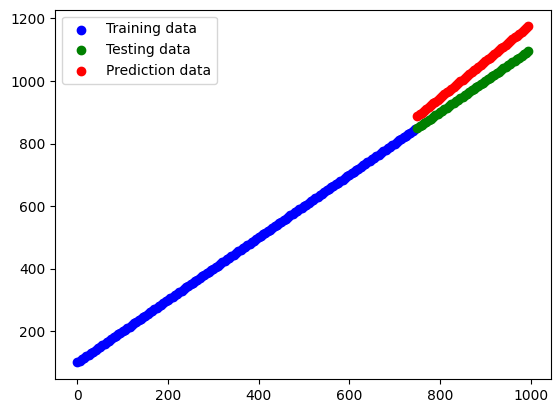

In [ ]:
# Plotting the new model
plt.figure(figure = (10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label = "Training data")
plt.scatter(x_reg_test, y_reg_test, c = 'g', label = 'Testing data')
plt.scatter(x_reg_test, y_reg_pred, c = 'r', label = 'Prediction data')
plt.legend();

## The missing peice: `Non-linearity`

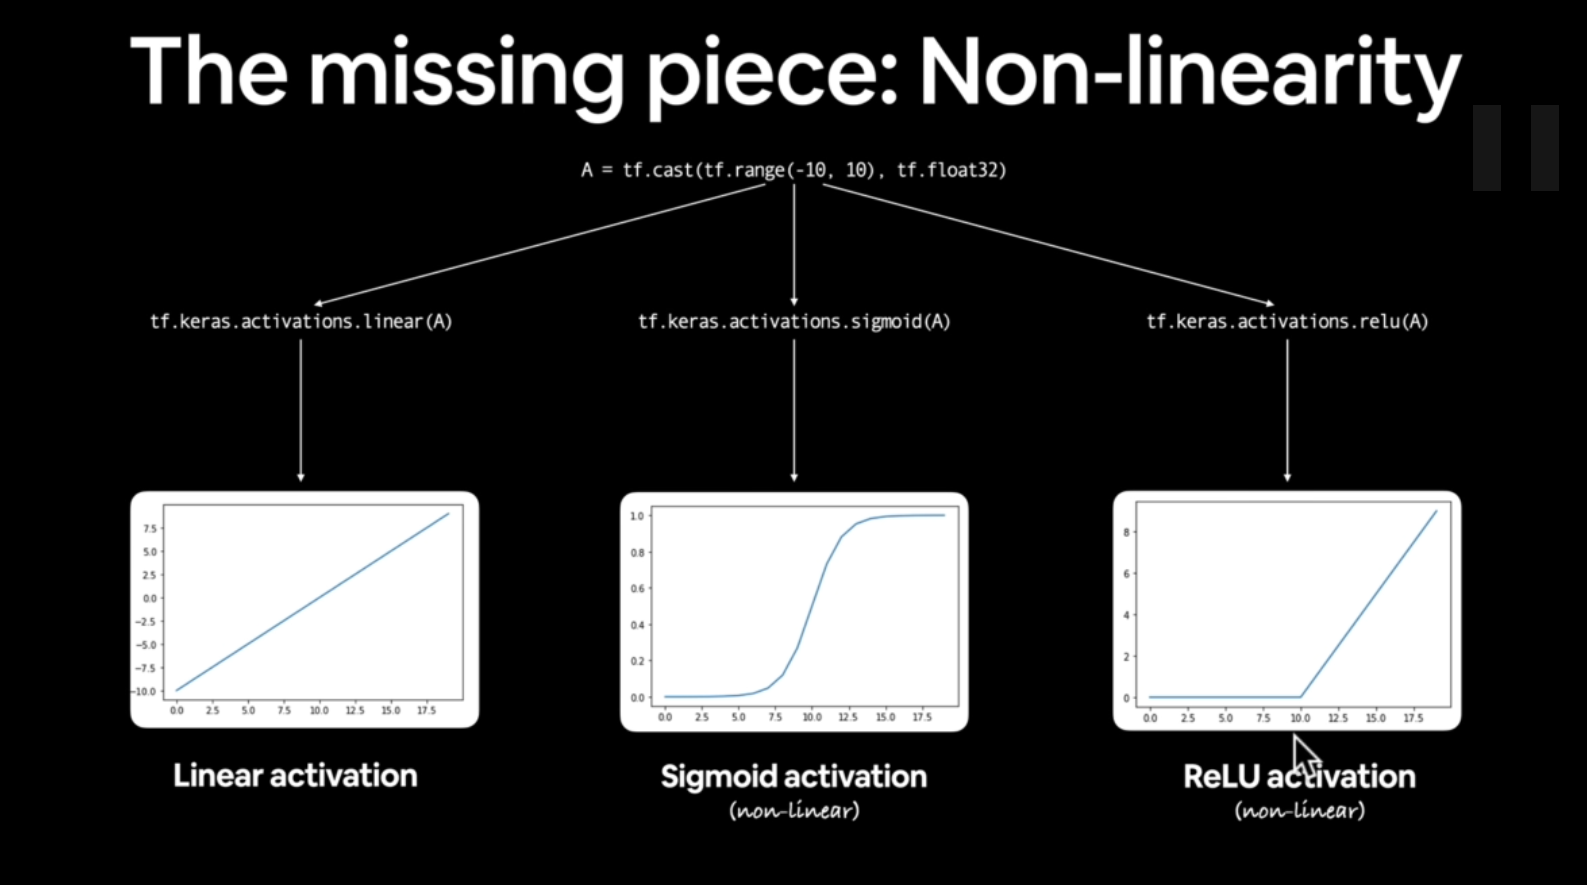

In [ ]:
# Set the random state
tf.random.set_seed(42)

# Create the mode
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear')
])

model4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history = model4.fit(x, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4767 - loss: 4.4033   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4794 - loss: 4.3719 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4794 - loss: 4.3711 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4794 - loss: 4.3706 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4794 - loss: 4.3701 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4794 - loss: 4.3695 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4794 - loss: 4.3690 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4794 - loss: 4.3685  
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4794 - loss: 4.3680 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4786 - loss: 4.3676 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4787 - loss: 4.3671 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

<Axes: >

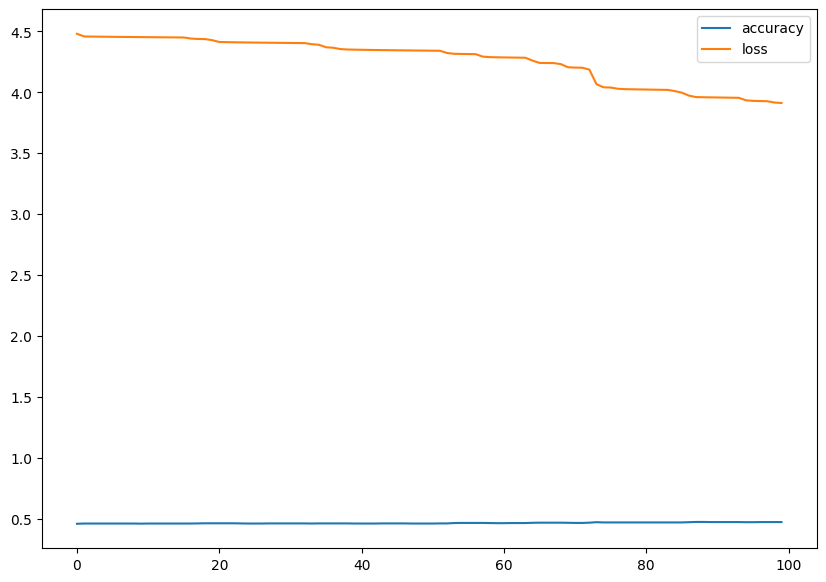

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7))

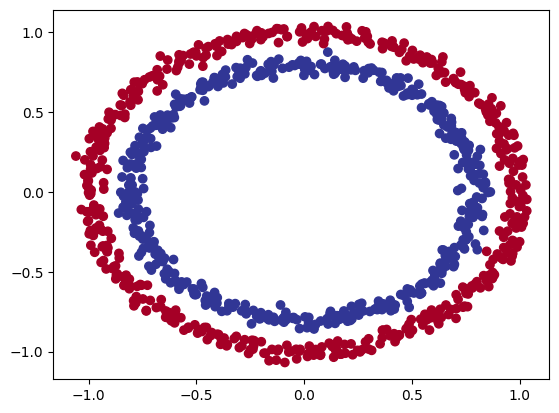

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


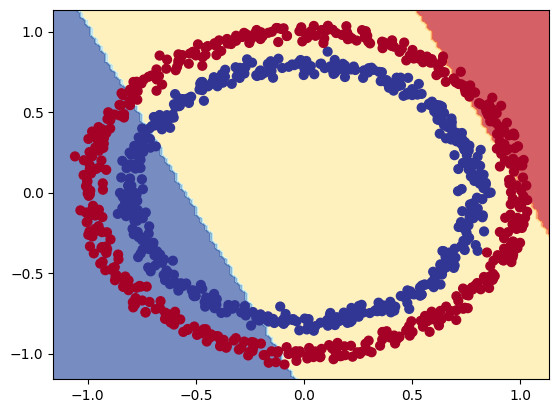

In [ ]:
plot_decision_boundary(model4, x, y)

In [ ]:
# Lets create another model
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'linear'),
])

model5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history = model5.fit(x, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4528 - loss: 4.5952   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4655 - loss: 4.5569 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4663 - loss: 4.4875 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4712 - loss: 4.3434
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4799 - loss: 4.1956 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4786 - loss: 4.1531 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4777 - loss: 4.0917 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4799 - loss: 4.0694 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4788 - loss: 4.0341 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4834 - loss: 3.9770 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4819 - loss: 3.9159 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


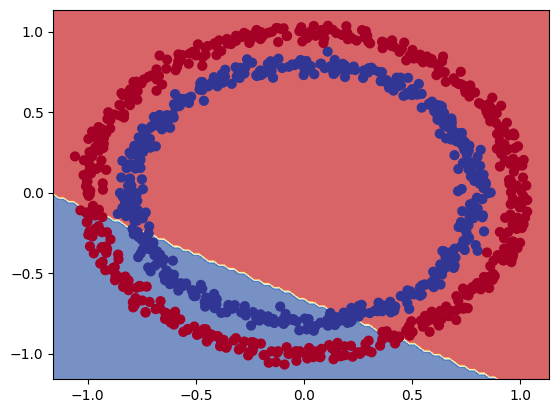

In [ ]:
plot_decision_boundary(model5, x, y)

<Axes: >

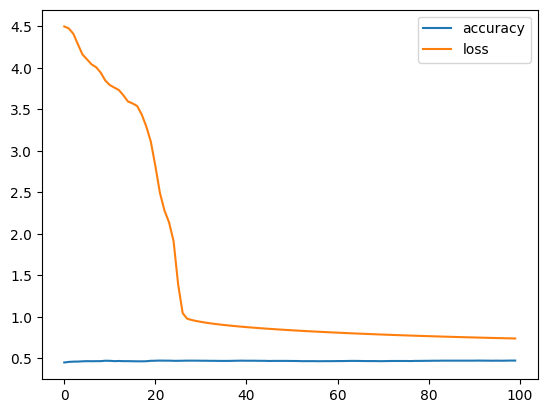

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# Lets create another model
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid),
])

model6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

history = model6.fit(x, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5147 - loss: 0.6936
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5850 - loss: 0.6646
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.5541 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9598 - loss: 0.3030
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.1324
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0549
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0332
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0249
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0215
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0184
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0170
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


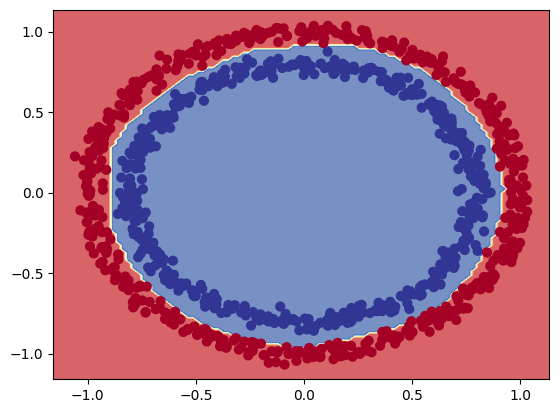

In [ ]:
plot_decision_boundary(model6, x, y)

<Axes: >

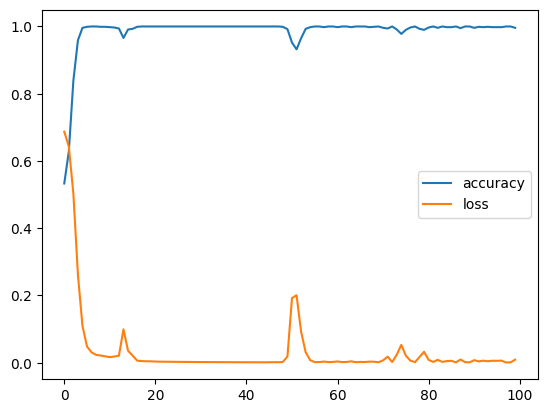

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model6.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9982 - loss: 0.0073  


[0.009606176987290382, 0.996999979019165]

> The combination of **linear (straight line) and non linear (non straight lines) functions** is one of the key fundamentals of neural network.



In [ ]:
# create a toy tensor (similar to the data we pass into our model)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

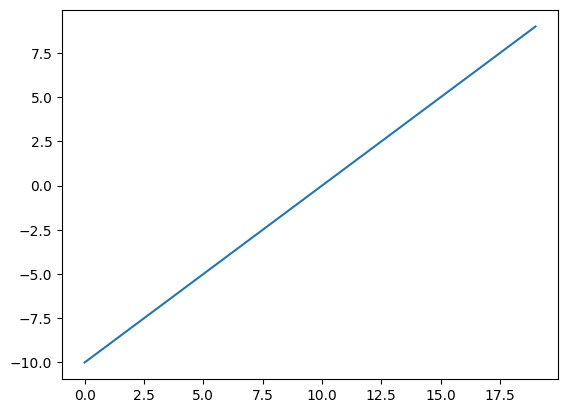

In [ ]:
plt.plot(A)

In [ ]:
# Lets start by replicating sigmoid
# sigmoid(x) = 1 / 1 + exp(-x)

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))


In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

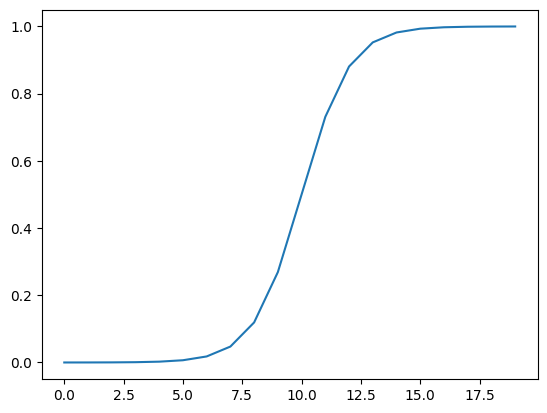

In [ ]:
plt.plot(sigmoid(A))

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(20,), dtype=float32)


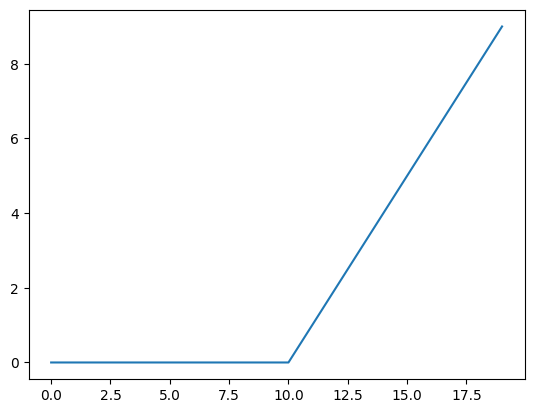

In [ ]:
# Lets see ReLU
def relu(x):
  # arr = []
  # for i in x:
  #   arr.append(max(i, 0))
  # return arr
  return tf.maximum(x, 0)

print(relu(A))

plt.plot(relu(A))

## Evaluating and improving our model

So far we gave been training and testing the model with training data only


In [ ]:
x,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
len(x)

1000

In [ ]:
x_train, x_test = x[:900], x[900:]
y_train, y_test = y[:900], y[900:]


In [ ]:
x_test.shape, y_test.shape

((100, 2), (100,))

In [ ]:
# Lets write the model
tf.random.set_seed(42)

model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid),
])

model7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

history = model7.fit(x_train, y_train, epochs = 100)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4803 - loss: 0.6966
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5526 - loss: 0.6708 
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6511 - loss: 0.6231 
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7808 - loss: 0.5114 
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9499 - loss: 0.3661 
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9797 - loss: 0.2603 
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9927 - loss: 0.1893 
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - loss: 0.1483 
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.1193 
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0997 
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9994 - loss: 0.0899 
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


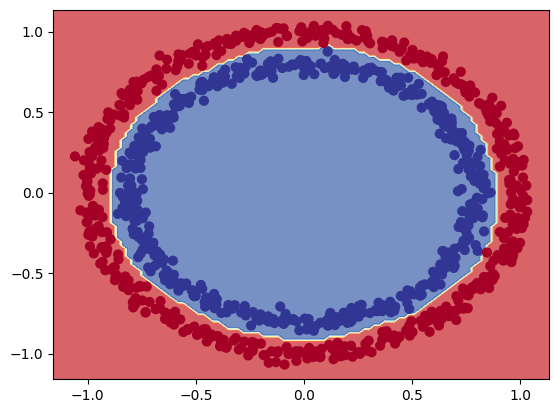

In [ ]:
plot_decision_boundary(model7, x, y)

<Axes: >

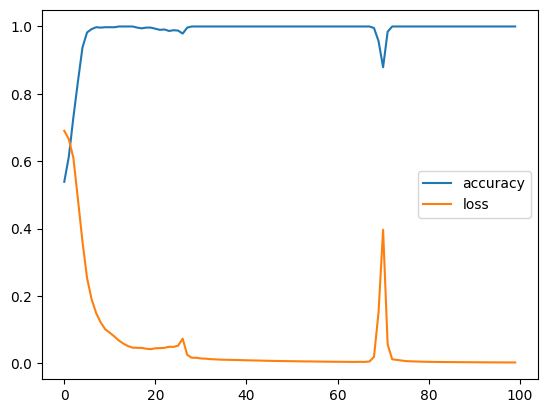

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model7.evaluate(x_train, y_train)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0024  


[0.0023811713326722383, 1.0]

In [ ]:
model7.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0051 


[0.006885795388370752, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


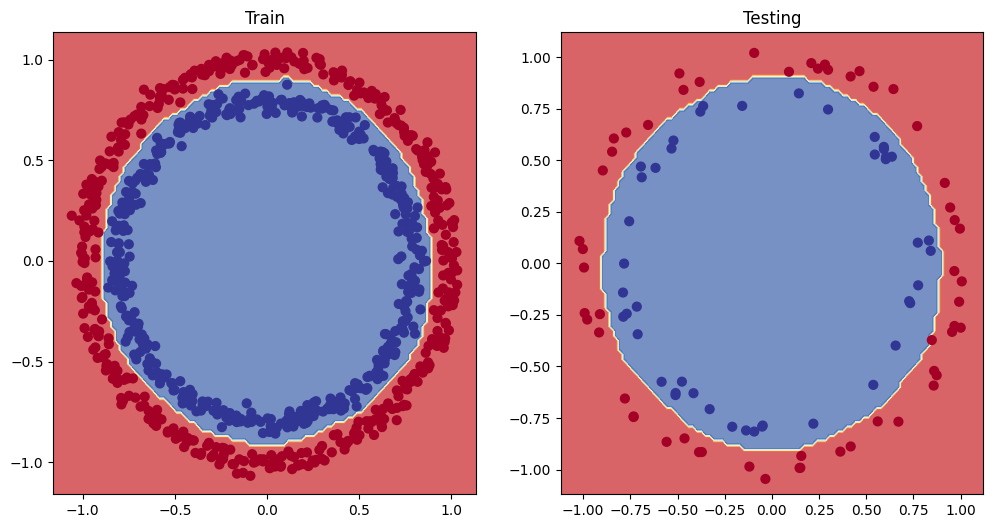

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model7, x_train, y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_decision_boundary(model7, x_test, y_test)
plt.show();

In [ ]:
# model.fit() return the history object for every epochs
# it gives us the history of the model
pd.DataFrame(history.history)

accuracy      loss
0   0.538889  0.690324
1   0.613333  0.665377
2   0.730000  0.610005
3   0.836667  0.486997
4   0.937778  0.360873
..       ...       ...
95  1.000000  0.002738
96  1.000000  0.002670
97  1.000000  0.002607
98  1.000000  0.002547
99  1.000000  0.002487

[100 rows x 2 columns]

# Finding the best learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during the training) we are going to use the following steps:

* `A learning rate **callback** `- you can think of a callback as an extra piece of functionality, you can add to your *while* its training
* `Another model`
* `A modified loss curves plot`

In [ ]:
# Lets write the model
tf.random.set_seed(42)

model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid),
])

model8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# fit the model
history = model8.fit(
    x_train,
    y_train,
    epochs = 100,
    callbacks = [lr_scheduler])



Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5141 - loss: 0.6919 - learning_rate: 1.0000e-04
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5157 - loss: 0.6913 - learning_rate: 1.1220e-04
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5185 - loss: 0.6908 - learning_rate: 1.2589e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5185 - loss: 0.6903 - learning_rate: 1.4125e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5228 - loss: 0.6897 - learning_rate: 1.5849e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5275 - loss: 0.6892 - learning_rate: 1.7783e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5169 - loss: 0.6886 - learning_rate: 1.9953e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5002 - loss: 0.6880 - learning_rate: 2.2387e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5002 - loss: 0.6873 - learning_

<Axes: >

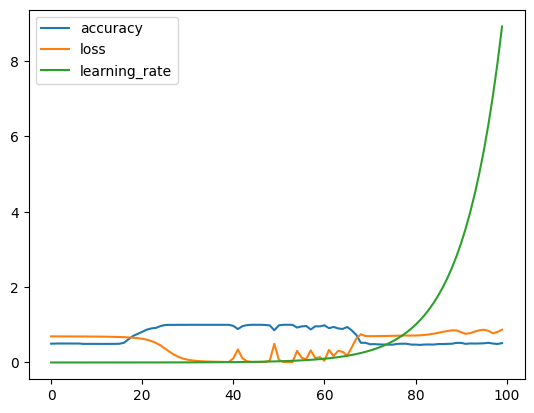

In [ ]:
pd.DataFrame(history.history).plot()

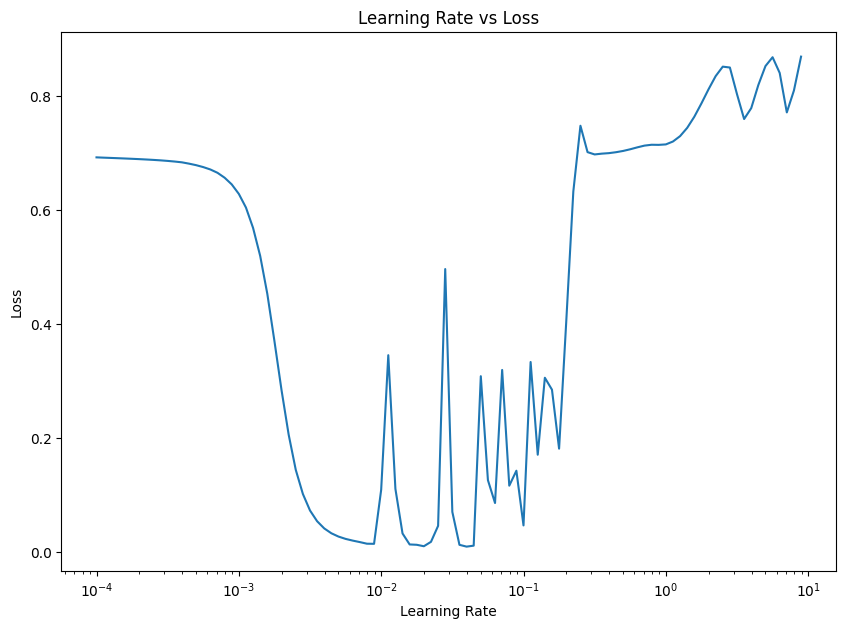

In [ ]:
# Plot learning rate vs loss

lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.show();

## More evaluation method in classification

Alongside visualising our model results as much as possible, there are a handful of other classification evaluation metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit learn)

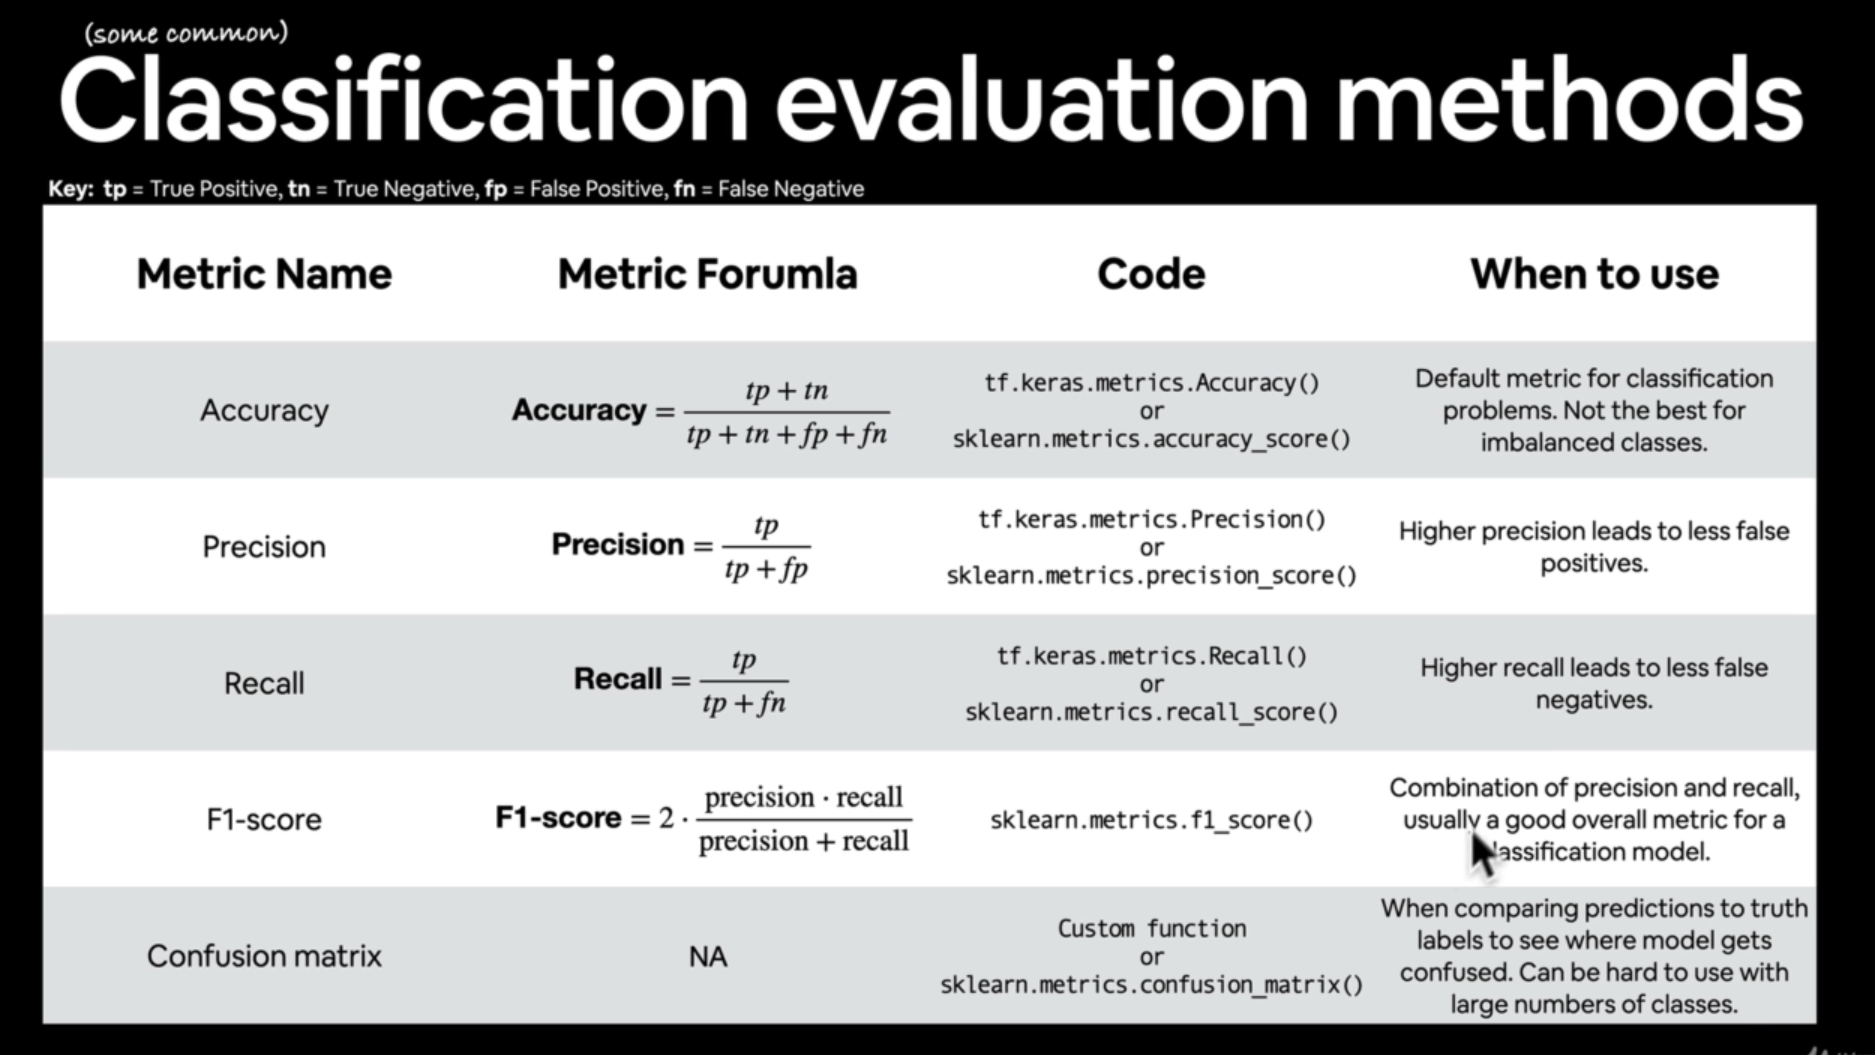

In [ ]:
# Lets get accuracy
loss, accuracy = model7.evaluate(x_test, y_test)
print('loss: ', loss)
print('accuracy: ', accuracy*100)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0051 
loss:  0.006885795388370752
accuracy:  100.0


In [ ]:
# Create confusion metric
from sklearn.metrics import confusion_matrix
y_pred = model7.predict(x_test)

confusion_matrix(y_test, y_pred)
#

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

Oops looks like our prediction has come out in **prediction probabilites** form. the standard output from the sigmoid/softmax activation functions


In [ ]:
# Convert the pred prob to binary format of 0 and 1

tf.round(y_pred[:10])


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create confusion metric
from sklearn.metrics import confusion_matrix
y_pred = model7.predict(x_test)

confusion_matrix(y_test, tf.round(y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[56,  0],
       [ 0, 44]])

In [ ]:
model7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [ ]:
model7.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0051 


[0.006885795388370752, 1.0]

In [ ]:
# Create confusion metric
from sklearn.metrics import confusion_matrix
y_pred = model7.predict(x_test)

confusion_matrix(y_test, tf.round(y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[56,  0],
       [ 0, 44]])

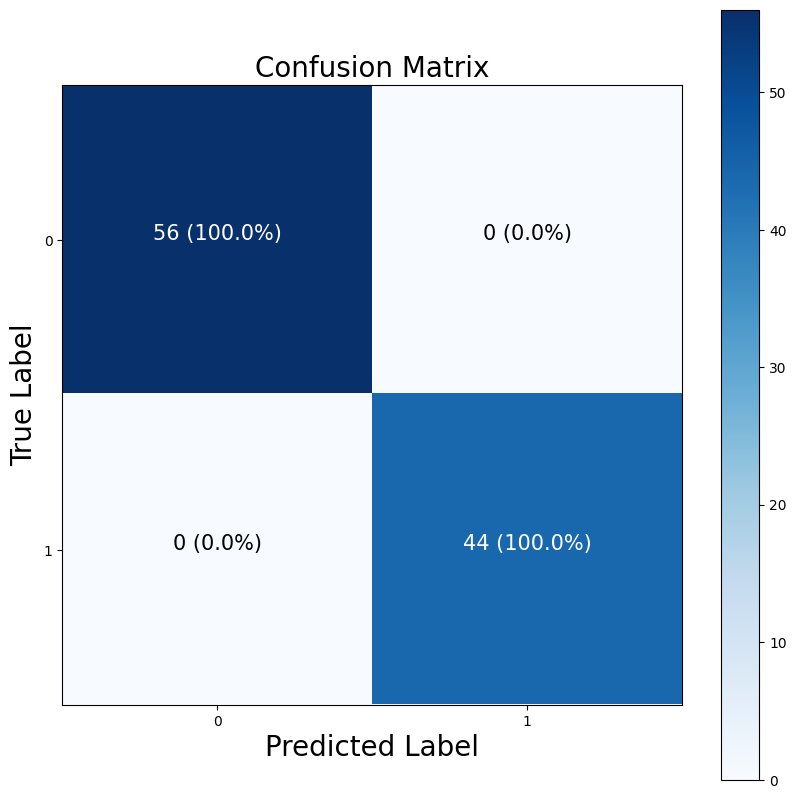

In [ ]:
# Lets pretify or confusion matrix

import itertools
figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalising our confusion matrix
n_classes = cm.shape[0]

# lets pretify it now
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(
    title = 'Confusion Matrix',
    xlabel = 'Predicted Label',
    ylabel = 'True Label',
    xticks = np.arange(n_classes),
    yticks = np.arange(n_classes),
    xticklabels = labels,
    yticklabels = labels
)

# Set the x axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjustt the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# Set threshold for different colors
threshold = (cm.max() + cm.min()) /2.

# Plot the text on each cell

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
           horizontalalignment='center',
           color = 'white' if cm[i, j] > threshold else 'black',
           size = 15
          )


# Working with larger datasets (multiclass classification)

When you have 3 or more different classes then it's called multiclass classification

To practice `multiclass classification`, we are going to build a neural network to classify images of different items.


In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist



In [38]:
# the data is already sorted into training and testing
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [39]:
# show the first training example
print("training x: ", train_data[0])
print("training y: ", train_labels[0])


training x:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1  

In [40]:
# Check the shape of the single exaple
train_data[0].shape, train_labels[0].shape

((28, 28), ())

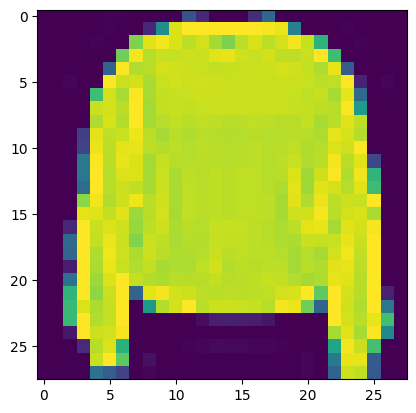

In [41]:
# plot a single sample
plt.imshow(train_data[7])

In [42]:
# create a small list so we can index onto our training labels so they are human readable
class_names = [
    "Tshirt/Top", 'Trouser', 'PullOver', "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

Text(0.5, 1.0, 'Bag')

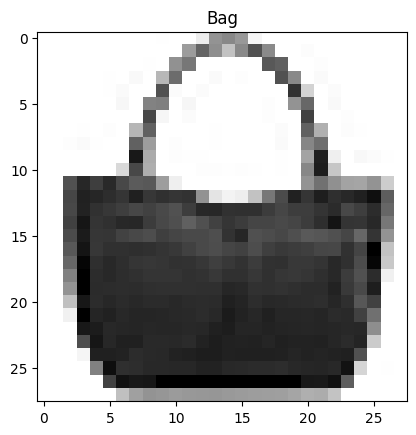

In [7]:
# plot an example image
idx = 100
plt.imshow(train_data[idx], cmap = plt.cm.binary)
plt.title(class_names[train_labels[idx]])

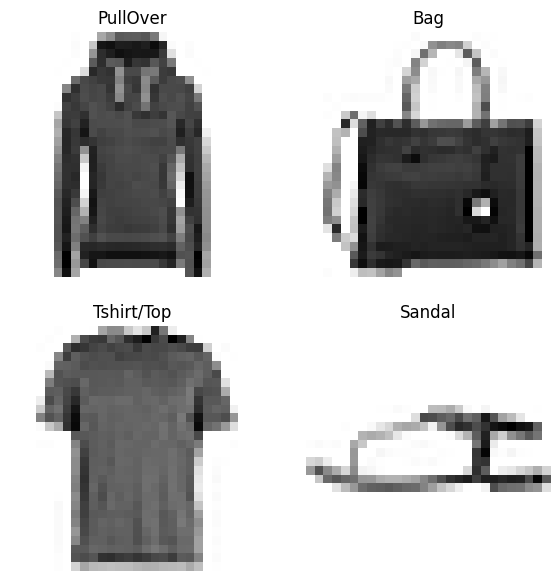

In [12]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  idx = random.choice(range(len(train_data)))
  plt.imshow(train_data[idx], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[idx]])
  plt.axis('off')

# Building the model
Before that we need to tweak few things

* Input shape = 28X x 28 (the shape of one image)
* output shape = 10 (one per class of clothing)
* loss function - categoricalCrossEntropy
 - if your label are one hot encoded use Categorical else use SparseCategorical or onehot encode them using tf.one_hot()
* Output layer activation - softmax

In [13]:
train_data[0].shape

(28, 28)

In [18]:
# building a multi-class classification model
tf.random.set_seed(42)

multimodel = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

multimodel.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

non_norm_history = multimodel.fit(train_data,
                                  train_labels,
                                  epochs = 10,
                                  validation_data = (test_data, test_labels))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6178 - loss: 14.3225 - val_accuracy: 0.5713 - val_loss: 0.9440
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5739 - loss: 1.0267 - val_accuracy: 0.4565 - val_loss: 1.2323
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3103 - loss: 1.7251 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1023 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1021 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1020 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1020 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1020 - loss: 2.3039 

In [19]:
y_pred = multimodel.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [20]:
multimodel.evaluate(test_data, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0978 - loss: 2.3042


[2.3040215969085693, 0.10000000149011612]

In [21]:
# building a multi-class classification model
tf.random.set_seed(42)

multimodel = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

multimodel.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

non_norm_history = multimodel.fit(train_data,
                                  tf.one_hot(train_labels, depth = 10), # 10 is the no of classes here
                                  epochs = 10,
                                  validation_data = (test_data, tf.one_hot(test_labels, depth = 10)))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5149 - loss: 13.4345 - val_accuracy: 0.5843 - val_loss: 0.9435
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6060 - loss: 0.9671 - val_accuracy: 0.6046 - val_loss: 0.9478
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5059 - loss: 1.2700 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1015 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1021 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.1021 - loss: 2.3038 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1021 - loss: 2.3038 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1020 - loss: 2.3038

In [22]:
multimodel.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 268,832 (1.03 MB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 179,222 (700.09 KB)

<Axes: >

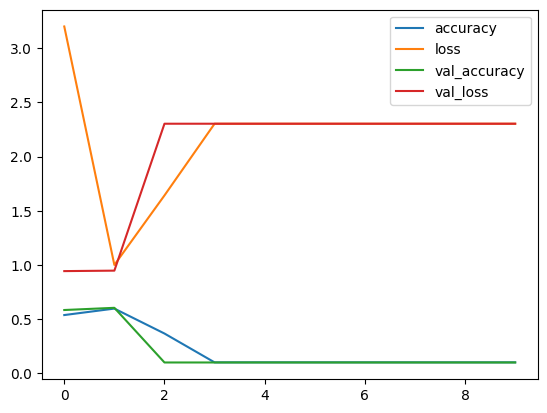

In [23]:
pd.DataFrame(non_norm_history.history).plot()

### Scaling / Normalising our data
Neural network prefer data to be scaled (or normalised), this means they like to have the numbers in the tensors they try to find the pattern between 0 and 1.


In [24]:
# Check the max and min
train_data.min(), train_data.max()

(0, 255)

In [43]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0


In [27]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [32]:
# We are just changing the data here, we will utilise the modified data

# building a multi-class classification model


tf.random.set_seed(42)

multimodel2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # here 10 is the size of class
])

multimodel2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

norm_history = multimodel2.fit(train_data_norm,
                                  tf.one_hot(train_labels, depth = 10), # 10 is the no of classes here
                                  epochs = 10,
                                  validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7593 - loss: 0.6787 - val_accuracy: 0.8305 - val_loss: 0.4711
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8404 - loss: 0.4543 - val_accuracy: 0.8234 - val_loss: 0.5742
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8447 - loss: 0.4405 - val_accuracy: 0.8364 - val_loss: 0.4581
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8521 - loss: 0.4154 - val_accuracy: 0.8416 - val_loss: 0.4617
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8547 - loss: 0.4089 - val_accuracy: 0.8524 - val_loss: 0.4165
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8574 - loss: 0.4018 - val_accuracy: 0.8378 - val_loss: 0.4927
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8602 - loss: 0.3937 - val_accuracy: 0.8392 - val_loss: 0.4808
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8620 - loss: 0.3889 - 

In [35]:
multimodel2.evaluate(test_data_norm, tf.one_hot(test_labels, depth = 10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8397 - loss: 0.4539


[0.4670424461364746, 0.8389999866485596]

<Axes: >

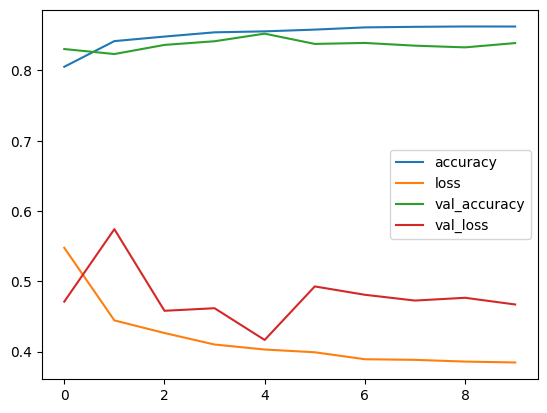

In [36]:
pd.DataFrame(norm_history.history).plot()

# Finding ideal Learning Rate

In [52]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
multimodel3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
multimodel3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = multimodel3.fit(train_data_norm,
                                  train_labels,
                                  epochs = 15,
                                  validation_data = (test_data_norm, test_labels),
                                  callbacks = [lr_scheduler])


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4178 - loss: 1.5973 - val_accuracy: 0.6337 - val_loss: 0.9066 - learning_rate: 0.0010
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6795 - loss: 0.8576 - val_accuracy: 0.7670 - val_loss: 0.7017 - learning_rate: 0.0011
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7713 - loss: 0.6676 - val_accuracy: 0.7847 - val_loss: 0.6331 - learning_rate: 0.0013
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7873 - loss: 0.6146 - val_accuracy: 0.7937 - val_loss: 0.6001 - learning_rate: 0.0014
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7968 - loss: 0.5882 - val_accuracy: 0.7955 - val_loss: 0.5906 - learning_rate: 0.0016
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8003 - loss: 0.5751 - val_accuracy: 0.7961 - val_loss: 0.5885 - learning_rate: 0.0018
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8022 - l

In [53]:
len(find_lr_history.history['loss'])

15

Text(0.5, 1.0, 'Learning Rate vs Loss')

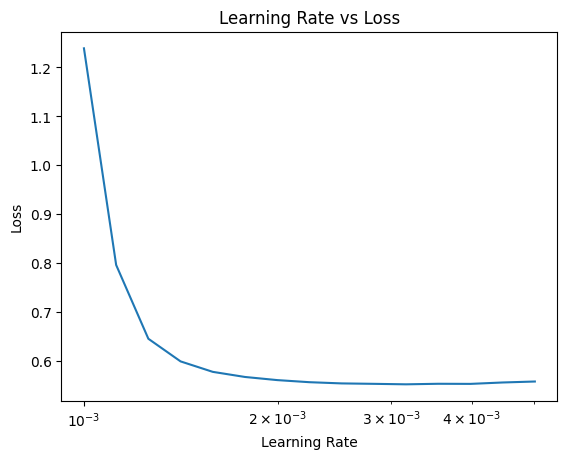

In [56]:
# Plot the lr rate decay curve

lrs = 1e-3 * 10**(np.arange(15)/20)
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')


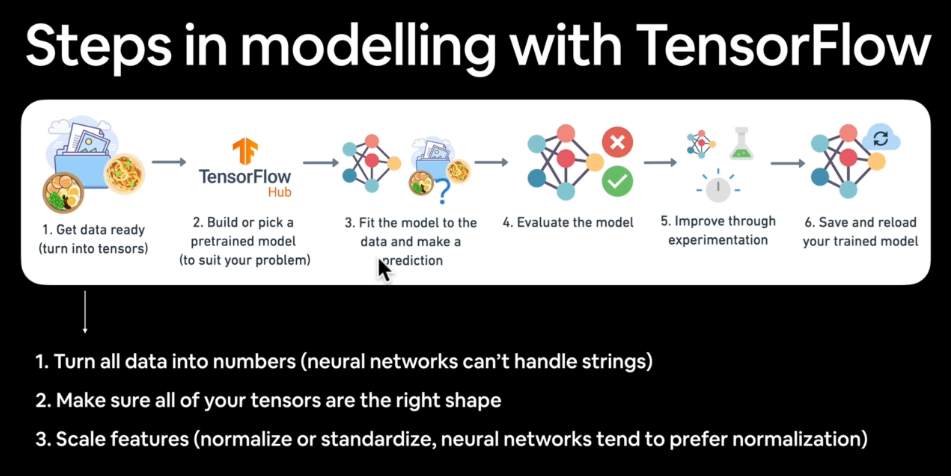

# Evaluating our multiclass classification model

To evaluate our multi class classification model we could:
* Evaluate our multiclass model using other classification metrics (such as confusion metrics)
* Asses some of its prediction (through visualization)
* Improve its result (by training it for longer or changing the architecture)
* Save and export it for use in an application


In [76]:
# Lets make the confusion matrix

import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
figsize = (10,10)

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size = 15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalising our confusion matrix
  n_classes = cm.shape[0]

  # lets pretify it now
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(
      title = 'Confusion Matrix',
      xlabel = 'Predicted Label',
      ylabel = 'True Label',
      xticks = np.arange(n_classes),
      yticks = np.arange(n_classes),
      xticklabels = labels,
      yticklabels = labels
  )

  # Set the x axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjustt the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) /2.

  # Plot the text on each cell

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
            horizontalalignment='center',
            color = 'white' if cm[i, j] > threshold else 'black',
            size = text_size
            )


In [77]:
class_names

['Tshirt/Top',
 'Trouser',
 'PullOver',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [78]:
y_probs = multimodel3.predict(test_data_norm) # y_prob is pred probabilities

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [79]:
y_probs[:5]

array([[1.4268176e-10, 1.4693827e-29, 1.7177165e-07, 4.0939416e-14,
        2.4951250e-06, 8.0261536e-02, 2.0645572e-05, 1.5618199e-01,
        2.8796025e-04, 7.6324517e-01],
       [9.9878034e-06, 6.7714017e-17, 9.7302759e-01, 1.2583801e-07,
        1.4501898e-02, 1.3997197e-06, 1.2458993e-02, 7.6822995e-14,
        4.1680028e-09, 3.6069680e-13],
       [2.3845474e-03, 9.7324556e-01, 2.3126198e-05, 2.4150727e-02,
        1.5819653e-05, 4.6236889e-07, 9.1384194e-05, 2.5418569e-07,
        8.8113266e-05, 9.0390699e-09],
       [2.3845474e-03, 9.7324556e-01, 2.3126198e-05, 2.4150727e-02,
        1.5819653e-05, 4.6236889e-07, 9.1384194e-05, 2.5418569e-07,
        8.8113266e-05, 9.0390699e-09],
       [4.0839821e-01, 2.3344198e-04, 1.9178574e-01, 4.8930157e-02,
        1.7543970e-02, 7.3821917e-05, 3.3109322e-01, 9.4870512e-07,
        1.9402724e-03, 9.0858755e-08]], dtype=float32)

In [80]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.4268176e-10, 1.4693827e-29, 1.7177165e-07, 4.0939416e-14,
        2.4951250e-06, 8.0261536e-02, 2.0645572e-05, 1.5618199e-01,
        2.8796025e-04, 7.6324517e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [81]:
# Lets turn our pred prob into integers
y_preds = y_probs.argmax(axis = 1)

In [82]:
y_preds[:5]

array([9, 2, 1, 1, 0])

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_preds)

0.8007

In [84]:
make_confusion_matrix(test_labels, y_pred, class_names)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [86]:
test_labels.shape, y_preds.shape

((10000,), (10000,))

In [88]:
multimodel3.evaluate(test_data_norm, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8055 - loss: 0.5794


[0.5929468870162964, 0.8007000088691711]

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_preds)
cm

array([[822,  13,  20,  78,   1,   3,  47,   2,  14,   0],
       [ 11, 942,   3,  40,   2,   0,   1,   0,   1,   0],
       [ 48,   0, 738,  26, 108,   1,  76,   0,   3,   0],
       [ 44,  63,  21, 814,  29,   1,  20,   1,   7,   0],
       [  2,   0, 192,  83, 604,   0, 112,   0,   7,   0],
       [  0,   0,   0,   1,   0, 897,   0,  55,   0,  47],
       [216,   4, 162,  58,  77,   0, 463,   0,  20,   0],
       [  0,   0,   0,   0,   0,  42,   0, 916,   0,  42],
       [ 13,   0,   2,   6,   3,   7,  51,   9, 884,  25],
       [  0,   0,   0,   0,   0,  16,   1,  54,   2, 927]])

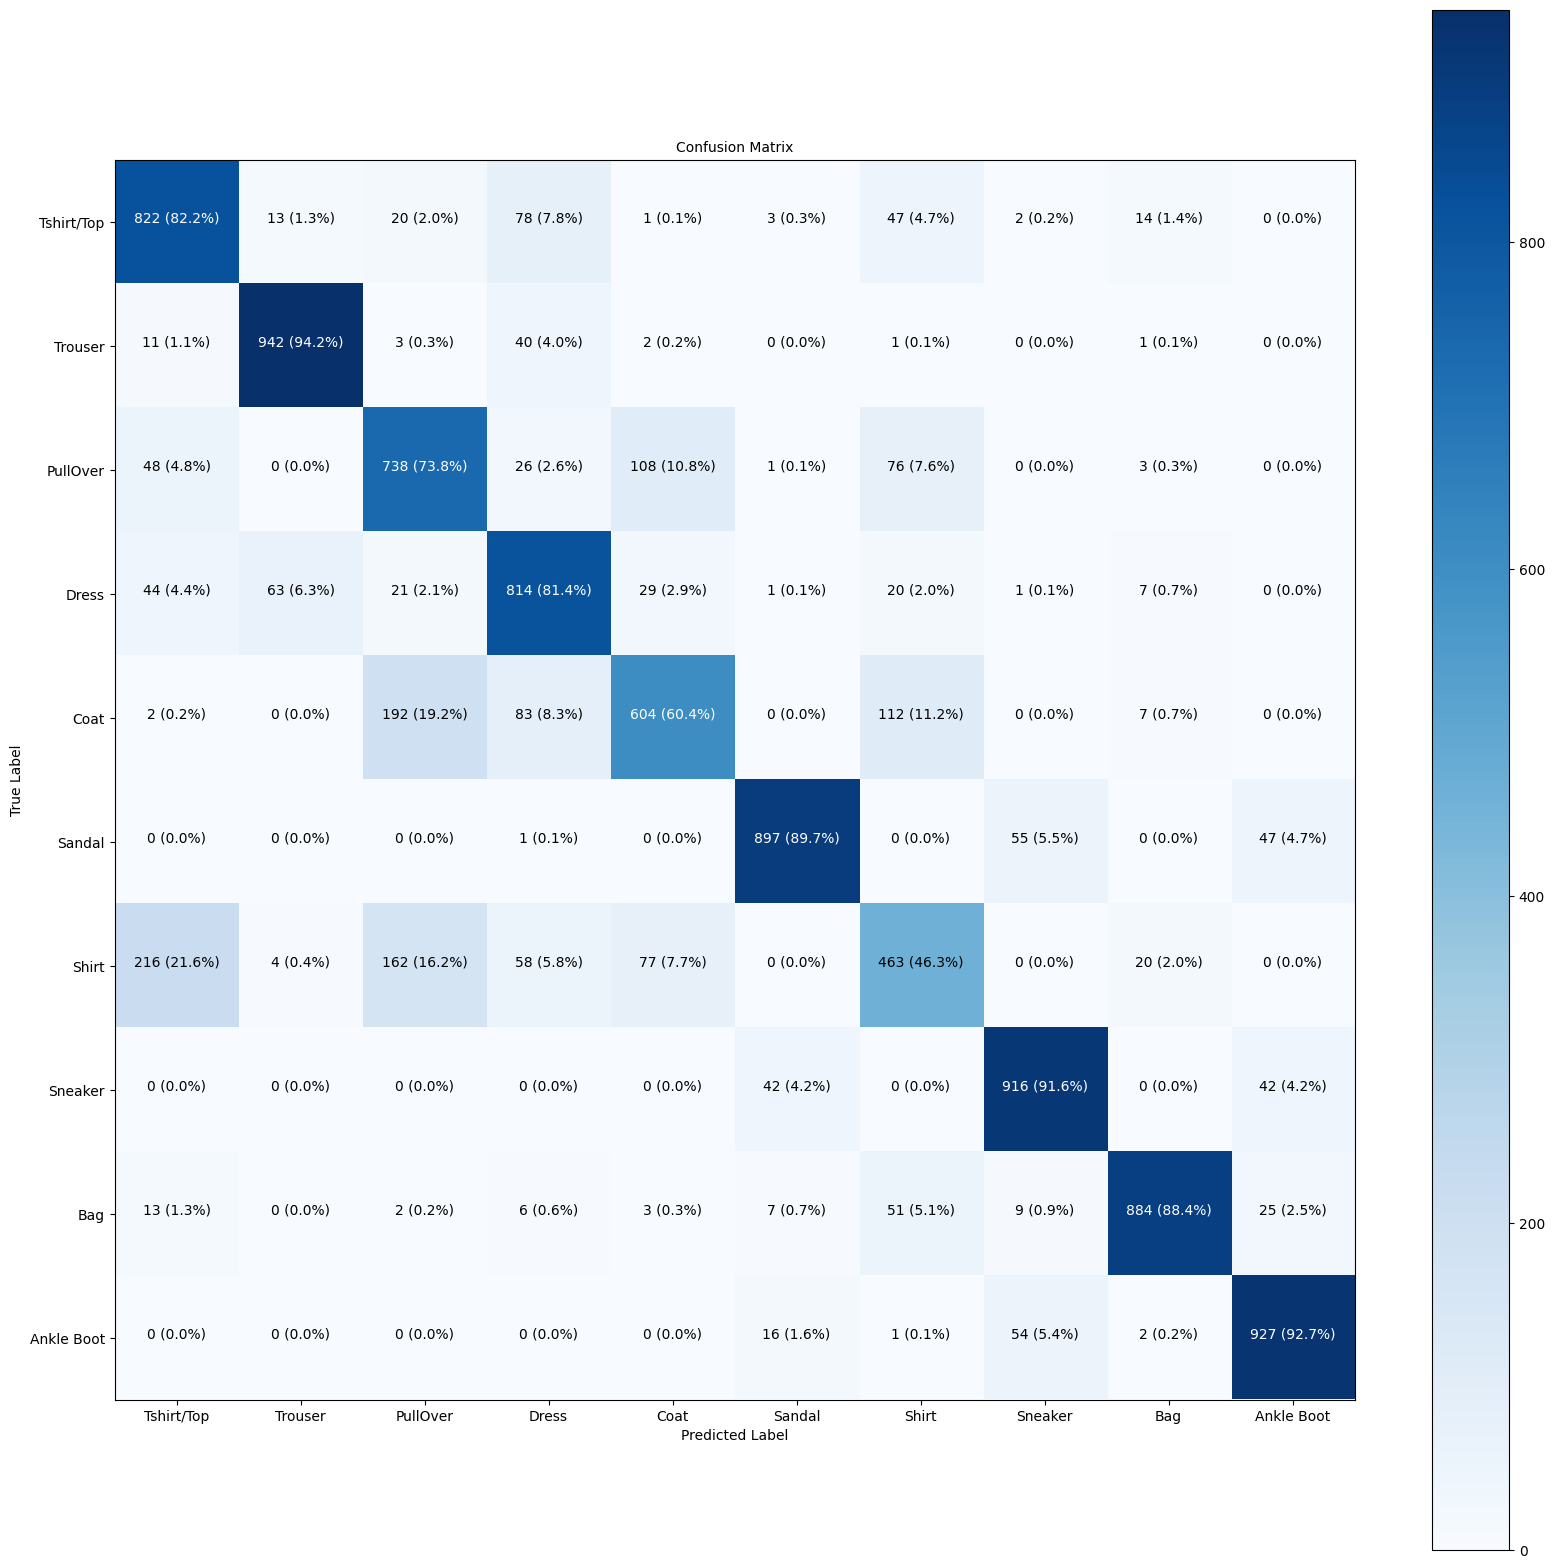

In [95]:
# Make a pretty confusion matrix
make_confusion_matrix(
    y_true = test_labels,
    y_pred = y_preds,
    classes = class_names,
    figsize = (20,20),
    text_size = 10
)

# 👀
> Often when working with images and other forms of visual data, its good idea to visualise as much as possible to develop a further understanding of the data and the inputs and outputs of your model

How about we create a fun lil function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and predicted labels

In [116]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with prediction and truth labels
  """
  # Set the random int
  i = random.randint(0, len(images))

  # Create predictions and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or not
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add the xlabel info like pred and true labels
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(
      pred_label,
      100*tf.reduce_max(pred_probs),
      true_label),
             color = color)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


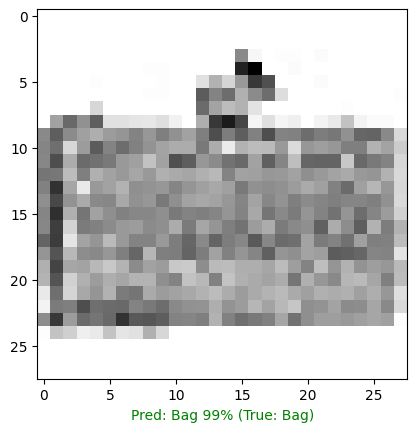

In [121]:
plot_random_image(
    model = multimodel3,
    images = test_data_norm,
    true_labels = test_labels,
    classes = class_names
)

# What patterns is our model learning?

In [122]:
# Find the layers of our most recent model
multimodel3.layers

[<Flatten name=flatten_9, built=True>,
 <Dense name=dense_27, built=True>,
 <Dense name=dense_28, built=True>,
 <Dense name=dense_29, built=True>]

In [124]:
# Extract a particular layer
multimodel3.layers[1]

<Dense name=dense_27, built=True>

In [130]:
# Get the patterns of a layer in our network
weight, baises = multimodel3.layers[1].get_weights()

# Shapes
print(weight.shape, baises.shape)
print("Weights", weight[1])
print("Baises", baises)


(784, 4) (4,)
Weights [ 0.22449191 -0.91474634  1.190253   -0.5758982 ]
Baises [3.1745882 1.7761164 3.4455502 3.7259555]


* The wieghts is initialised randomly in the network
* Then our model just the various examples and teaches it the correct label

* The baises vector get initialised as Zero (0)
* This vector dictates how much the pattern within the corresponding weight matrix should influence the next layer

* Every neuron has a bais vector. Each of these is paired with a weight matrix
* Each weight matrix is paired with each data point (dim of image)

In [132]:
multimodel3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

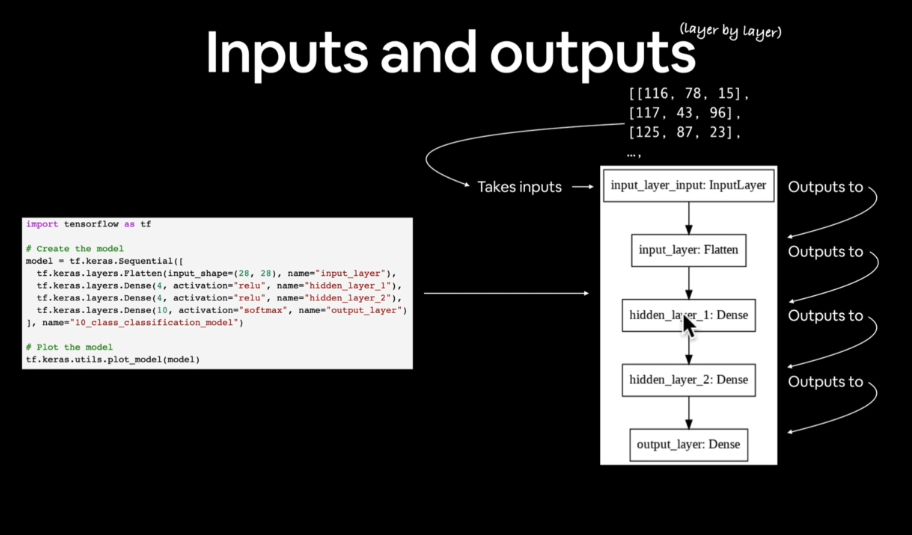

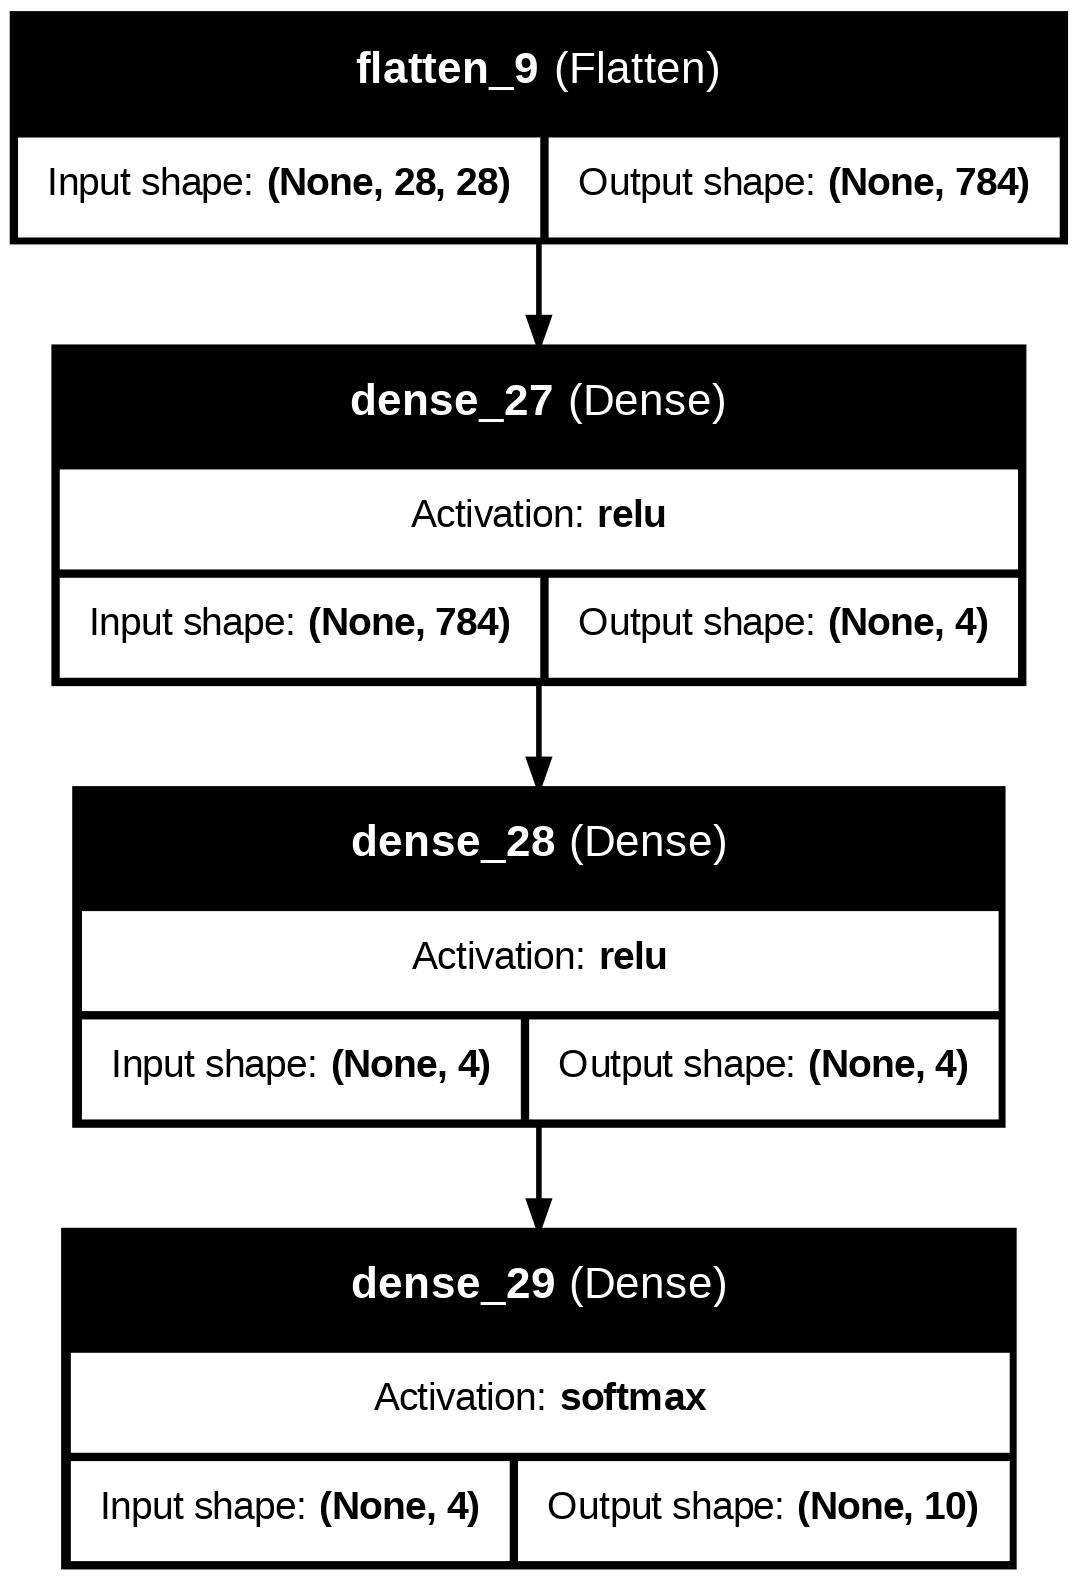

In [136]:
# Lets check out the other way to view of deep model
from tensorflow.keras.utils import plot_model
plot_model(multimodel3, show_shapes=True, show_layer_names=True, show_layer_activations=True)